In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

In [ ]:
df = pd.read_csv('Travel.csv')

# Data Deskriptif

In [ ]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerid                4888 non-null   int64  
 1   prodtaken                 4888 non-null   int64  
 2   age                       4662 non-null   float64
 3   typeofcontact             4863 non-null   object 
 4   citytier                  4888 non-null   int64  
 5   durationofpitch           4637 non-null   float64
 6   occupation                4888 non-null   object 
 7   gender                    4888 non-null   object 
 8   numberofpersonvisiting    4888 non-null   int64  
 9   numberoffollowups         4843 non-null   float64
 10  productpitched            4888 non-null   object 
 11  preferredpropertystar     4862 non-null   float64
 12  maritalstatus             4888 non-null   object 
 13  numberoftrips             4748 non-null   float64
 14  passport

In [ ]:
df.isna().sum()

,0
customerid,0
prodtaken,0
age,226
typeofcontact,25
citytier,0
durationofpitch,251
occupation,0
gender,0
numberofpersonvisiting,0
numberoffollowups,45


In [ ]:
nums = ['customerid','age','durationofpitch','numberofpersonvisiting','numberoffollowups','preferredpropertystar',\
        'numberoftrips','pitchsatisfactionscore','numberofchildrenvisiting','monthlyincome']
cats = ['typeofcontact', 'occupation','gender','productpitched', 'maritalstatus', 'designation','citytier','prodtaken','passport','owncar']

In [31]:
df[nums].describe()

,customerid,age,durationofpitch,numberofpersonvisiting,numberoffollowups,preferredpropertystar,numberoftrips,pitchsatisfactionscore,numberofchildrenvisiting,monthlyincome
count,4888.000000,4662.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,37.622265,15.490835,2.905074,3.708445,3.581037,3.236521,3.078151,1.187267,23619.853491
std,1411.188388,9.316387,8.519643,0.724891,1.002509,0.798009,1.849019,1.365792,0.857861,5380.698361
min,200000.000000,18.000000,5.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1000.000000
25%,201221.750000,31.000000,9.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,20346.000000
50%,202443.500000,36.000000,13.000000,3.000000,4.000000,3.000000,3.000000,3.000000,1.000000,22347.000000
75%,203665.250000,44.000000,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,204887.000000,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,5.000000,3.000000,98678.000000


In [ ]:
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom customerid:
customerid
200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: count, Length: 4888, dtype: int64

Value count kolom age:
age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64

Value count kolom durationofpitch:
durationofpitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     1

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom typeofcontact:
typeofcontact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

Value count kolom occupation:
occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

Value count kolom gender:
gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

Value count kolom productpitched:
productpitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

Value count kolom maritalstatus:
maritalstatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

Value count kolom designation:
designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

Value count kolom citytier:
citytier
1    3190
3    1500
2     198
Name: count, dtype: int64

Valu

# DATA CLEANSING

## Handling Missing Value

In [ ]:
# Melihat jumlah missing values di setiap kolom
missing_values = df.isnull().sum()
print(missing_values)

customerid                    0
prodtaken                     0
age                         226
typeofcontact                25
citytier                      0
durationofpitch             251
occupation                    0
gender                        0
numberofpersonvisiting        0
numberoffollowups            45
productpitched                0
preferredpropertystar        26
maritalstatus                 0
numberoftrips               140
passport                      0
pitchsatisfactionscore        0
owncar                        0
numberofchildrenvisiting     66
designation                   0
monthlyincome               233
dtype: int64


In [ ]:
# Mengisi missing values dengan median untuk kolom numerik
df['age'].fillna(df['age'].median(), inplace=True)
df['durationofpitch'].fillna(df['durationofpitch'].median(), inplace=True)
df['numberoffollowups'].fillna(df['numberoffollowups'].median(), inplace=True)
df['numberoftrips'].fillna(df['numberoftrips'].median(), inplace=True)
df['numberofchildrenvisiting'].fillna(df['numberofchildrenvisiting'].median(), inplace=True)
df['monthlyincome'].fillna(df['monthlyincome'].median(), inplace=True)
df['preferredpropertystar'].fillna(df['preferredpropertystar'].median(), inplace=True)

# Mengisi missing values dengan modus untuk kolom kategorikal
df['typeofcontact'].fillna(df['typeofcontact'].mode()[0], inplace=True)

# Melihat jumlah missing values di setiap kolom setelah diisi
missing_values_after = df.isnull().sum()
print(missing_values_after)

customerid                  0
prodtaken                   0
age                         0
typeofcontact               0
citytier                    0
durationofpitch             0
occupation                  0
gender                      0
numberofpersonvisiting      0
numberoffollowups           0
productpitched              0
preferredpropertystar       0
maritalstatus               0
numberoftrips               0
passport                    0
pitchsatisfactionscore      0
owncar                      0
numberofchildrenvisiting    0
designation                 0
monthlyincome               0
dtype: int64


## Handling Duplicates

In [ ]:
# Mengidentifikasi duplikasi
duplicated_rows = df.duplicated().sum()
print(f"Duplicated rows: {duplicated_rows}")

# Handling Inconsistent Categorical Values

In [ ]:
df['gender'] = df['gender'].replace('Fe Male', 'Female')
df['maritalstatus'] = df['maritalstatus'].replace('Single', 'Unmarried')

In [ ]:
handled = ['gender', 'maritalstatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom gender:
gender
Male      2916
Female    1972
Name: count, dtype: int64

Value count kolom maritalstatus:
maritalstatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64



## Handling Outliers

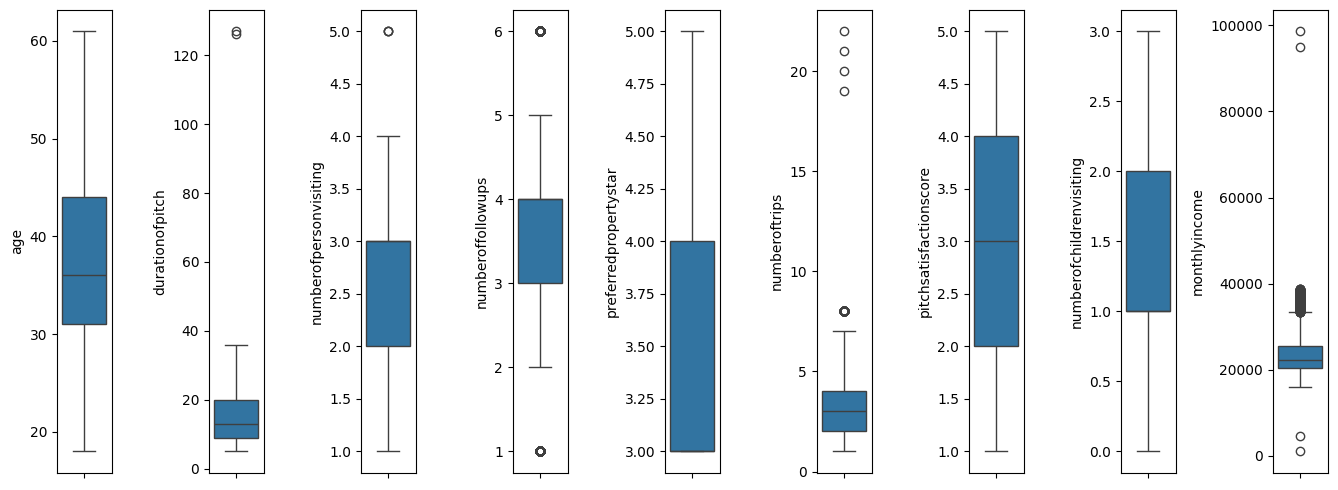

In [ ]:
plt.figure(figsize=(15,5))
for i in range(1, len(nums)):
    plt.subplot(1, 10, i)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
import numpy as np

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

# Daftar kolom numerik
nums_outliers = ['durationofpitch','numberoftrips', 'monthlyincome']

# Inisialisasi array untuk menyimpan status filtered entries
filtered_entries = np.array([True] * len(df))

# Memfilter outliers berdasarkan Z-score
for col in nums_outliers:
    zscore = abs(stats.zscore(df[col]))  # Hitung absolute Z-score
    filtered_entries = (zscore < 3) & filtered_entries  # Keep yang Z-score < 3

# Filter data berdasarkan Z-score
df_after_outliers = df[filtered_entries]

# Jumlah Baris Setelah Memfilter Outlier
print(f'Jumlah baris setelah memfilter outlier: {len(df_after_outliers)}')

Jumlah baris sebelum memfilter outlier: 4888
Jumlah baris setelah memfilter outlier: 4878


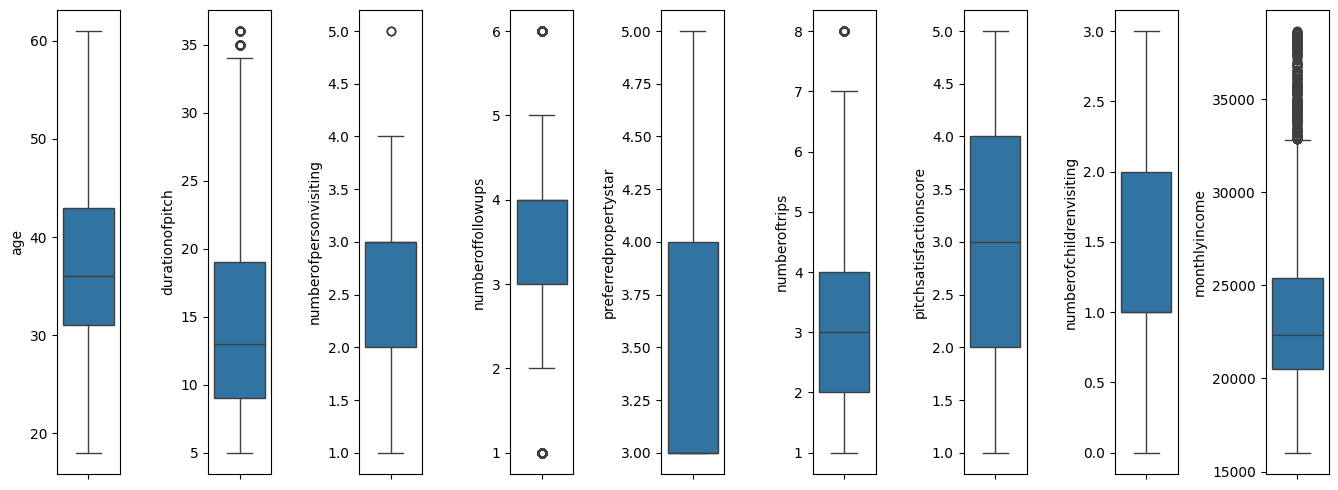

In [ ]:
# Box plot setelah outliers
plt.figure(figsize=(15,5))
for i in range(1, len(nums)):
    plt.subplot(1, 10, i)
    sns.boxplot(y=df_after_outliers[nums[i]])
    plt.tight_layout()
plt.show()

## Feature Encoding

In [33]:
df['segmentasi_umur'] = df['segmentasi_umur'].map({'Teen':0,
                                                            'Adult':1,
                                                            'Elderly':2})

In [38]:
from sklearn.preprocessing import OneHotEncoder

#One hot encoding
encoder = OneHotEncoder(sparse=False)
for cat in ['typeofcontact', 'occupation', 'maritalstatus','designation','gender','productpitched']:
    onehots = pd.DataFrame(encoder.fit_transform(df[[cat]]), columns=encoder.get_feature_names_out([cat]))
    df = df.join(onehots)

In [40]:
df.head()

,customerid,prodtaken,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,...,designation_Manager,designation_Senior Manager,designation_VP,gender_Female,gender_Male,productpitched_Basic,productpitched_Deluxe,productpitched_King,productpitched_Standard,productpitched_Super Deluxe
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Handling Imbalanced Dataset

# Feature Engineering

## Feature Selection

<Axes: >

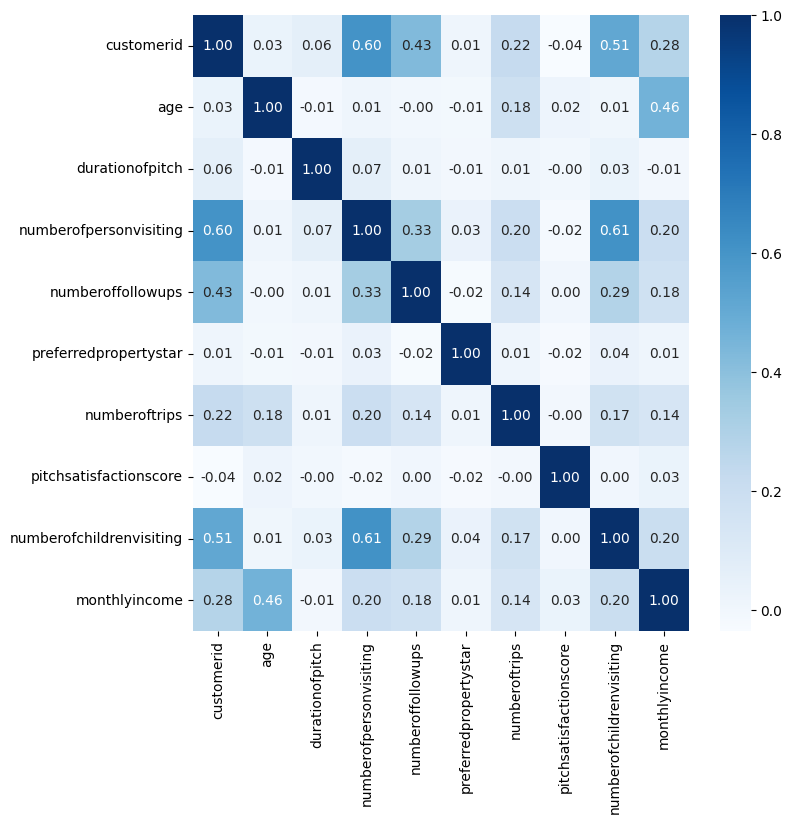

In [36]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

In [23]:
def correlation(dataset, threshold):
    col_corr = set()  #
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(df.select_dtypes(exclude=object).drop(columns='prodtaken'), 0.7)
corr_features

set()

## Feature Extraction

In [29]:
def segment(x):
    if x['age'] <= 21:
        segment = 'Teen'
    elif (x['age'] >= 21 and x['age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [30]:
df['segmentasi_umur'] = df.apply(lambda x: segment(x), axis=1)
df.head()

,customerid,prodtaken,age,typeofcontact,citytier,durationofpitch,occupation,gender,numberofpersonvisiting,numberoffollowups,...,preferredpropertystar,maritalstatus,numberoftrips,passport,pitchsatisfactionscore,owncar,numberofchildrenvisiting,designation,monthlyincome,segmentasi_umur
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Elderly


## 4 Fitur Tambahan

* Marketing Cost : Untuk memperkirakan biaya pemasaran produk
* Loyalty : Seberapa banyak customer membeli paket
* Complaint : Keluhan dari customer
* Type of Marketing : Jenis pemasaran yang dilakukan untuk mengakuisisi pelanggan